#**Data**

**Loading Data**

In [ ]:
# loading a datafile from your Google Drive directory
from google.colab import drive
my_path = '/content/drive'
drive.mount(my_path)
# converting datafile into a pandas dataframe
file = open("/content/drive/My Drive/CIS509/political_orientation_data.json", "r") # replace this path to open a data file
import pandas as pd
df = pd.read_json(file, lines=True) # representing data as a panda dataframe
#df.head()
df.shape

Mounted at /content/drive


(5000, 2)

In [ ]:
df

,text,label
0,"50 Years On, The Feminist Press Is Radical and...",Liberal
1,Anti-worker bills are working their way throug...,Liberal
2,The FBI Seized Almost $1 Million From This Fam...,Conservative
3,Stephanie Grisham’s Book Details Trump’s ‘Terr...,Liberal
4,How Trump kept peace,Conservative
...,...,...
4995,The Gender Reveal That Doesn’t,Liberal
4996,Why Socialism Failed,Conservative
4997,‎Reimagining Soviet Georgia - Episode 12: Blac...,Liberal
4998,Analysis: It's time to admit it: Mitt Romney w...,Liberal


**Data Preparation**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer # we can use TFKeras built-in vectorizer but scikit-learn's vectorizer is more straightforward
corpus = [] # store all reviews here so that we can fit the vectorizer with this dataset
y = []
count = 0
for index, row in df.iterrows():
  text = row['text'] 
  if row['label'] == "Liberal":
    label = 1 # Liberal
  else:
    label = 0 # Conservative
  corpus.append(text)
  y.append(label)
  count += 1
  if count == 5000:
    break
vectorizer = TfidfVectorizer(max_features=10000) # the value of max_features is dependent on how you design your model
vectorizer.fit(corpus) # fit the vectorizer with the entire dataset
# once we fitted the vectorizer, we use it for converting raw text (review) into vectors
vectorized_review = vectorizer.transform(corpus)

In [ ]:
#print(vectorized_review.shape)
#print(type(vectorized_review))
import numpy as np
X, Y = vectorized_review.toarray(), np.asarray(y) # convert both input (vectorized_review) and output (y) into numpy variables so that a TFkeras model can understand them

#**artificial neural network with two hidden layer**

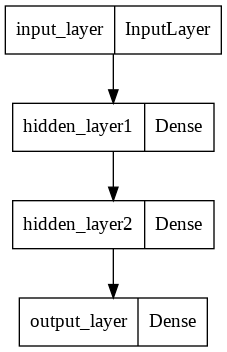

In [ ]:
import tensorflow as tf
input_layer = tf.keras.Input(shape=10000, name="input_layer")
hidden_layer1 = tf.keras.layers.Dense(units=5000, activation="relu", name="hidden_layer1")(input_layer)
hidden_layer2 = tf.keras.layers.Dense(units=2500, activation="relu", name="hidden_layer2")(hidden_layer1)
output_layer = tf.keras.layers.Dense(units=1, activation="sigmoid", name="output_layer")(hidden_layer2)
model = tf.keras.Model(inputs=input_layer, outputs=output_layer, name="ANN_two_hidden_layer")
model.compile(loss="binary_crossentropy", optimizer="SGD", metrics=[tf.keras.metrics.Precision(name="precision"),tf.keras.metrics.Recall(name="recall"),tf.keras.metrics.BinaryAccuracy(name="accuracy")])
#model.summary()
tf.keras.utils.plot_model(model)

**Model Save**

In [ ]:
filepath = "/content/drive/My Drive/CIS509/"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=filepath, save_best_only=True, monitor="val_accuracy", mode="max", verbose=1) # Saves only the best model (i.e., for each epoch during training, save model only if the current version outperforms the previous version)
model.fit(x=X, y=Y, epochs=30, batch_size=8, validation_split=0.25, callbacks=cp_callback)

Epoch 1/30
469/469 [==============================] - ETA: 0s - loss: 0.6573 - precision: 0.6490 - recall: 0.9996 - accuracy: 0.6488
Epoch 1: val_accuracy improved from -inf to 0.64320, saving model to /content/drive/My Drive/CIS509/
INFO:tensorflow:Assets written to: /content/drive/My Drive/CIS509/assets
469/469 [==============================] - 136s 289ms/step - loss: 0.6573 - precision: 0.6490 - recall: 0.9996 - accuracy: 0.6488 - val_loss: 0.6510 - val_precision: 0.6432 - val_recall: 1.0000 - val_accuracy: 0.6432
Epoch 2/30
469/469 [==============================] - ETA: 0s - loss: 0.6473 - precision: 0.6491 - recall: 1.0000 - accuracy: 0.6491
Epoch 2: val_accuracy did not improve from 0.64320
469/469 [==============================] - 133s 283ms/step - loss: 0.6473 - precision: 0.6491 - recall: 1.0000 - accuracy: 0.6491 - val_loss: 0.6509 - val_precision: 0.6432 - val_recall: 1.0000 - val_accuracy: 0.6432
Epoch 3/30
469/469 [==============================] - ETA: 0s - loss: 0.646

**Model Load and reuse**

In [ ]:
import tensorflow as tf
#filepath = "/content/drive/My Drive/ASU_courses/CIS509/saved_model/"
new_model = tf.keras.models.load_model("/content/drive/My Drive/CIS509/")
new_model.summary()

Model: "ANN_two_hidden_layer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 10000)]           0         
                                                                 
 hidden_layer1 (Dense)       (None, 5000)              50005000  
                                                                 
 hidden_layer2 (Dense)       (None, 2500)              12502500  
                                                                 
 output_layer (Dense)        (None, 1)                 2501      
                                                                 
Total params: 62,510,001
Trainable params: 62,510,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
new_data = ["Anarcho-capitalism, in my opinion, is a doctrinal system which, if ever implemented, would lead to forms of tyranny and oppression that have few counterparts in human history.",
            "Biden's Response to Putin's Invasion of Ukraine Has Been His Finest Moment"]

vectorized_new_data = vectorizer.transform(new_data)
new_x = vectorized_new_data.toarray()
new_model.predict(new_x)

array([[0.67927074],
       [0.02826622]], dtype=float32)